In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

#df=pd.read_csv("WhatsgoodlyData-6.csv") # use this one is data is downloaded offline in same folder
df=pd.read_csv("/kaggle/input/social-influence-on-shopping/WhatsgoodlyData-6.csv")


In [2]:
def _data(data):
    return data.head(3)

def describe_data(data):
    describe=data.describe()
    shape=data.shape
    columns=data.columns
    null_values=data.isnull().sum()
    print(shape,"\n")
    print(columns,"\n")
    print(describe)
    return null_values

def unique_data(data):
    segment_type=data['Segment Type'].unique()
    segment_description=data['Segment Description'].unique()
    answers=data['Answer'].unique()
    print(segment_type,"\n")
    print(segment_description,"\n")
    return answers

def convert_unique_values(data):
    column_mapping = {'Segment Type': {'Mobile': 1, 'Web': 2, 'Gender': 3, 'University':4, 'Custom':5},
                  'Answer': {'Facebook': 1, 'Instagram': 2, 'Snapchat': 3,'Twitter':4,'nan':5}}

    for column, value_map in column_mapping.items():
        data[column] = data[column].map(value_map)
    return data
    
def clean_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text)).lower()
    return cleaned_text


def sentiment_analysis(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_score = sid.polarity_scores(text)
    return sentiment_score

def analyze_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity



In [3]:
_data(df)

,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,What social platform has influenced your onlin...,Mobile,Global results,Facebook,548,0.205
1,What social platform has influenced your onlin...,Mobile,Global results,Instagram,916,0.342
2,What social platform has influenced your onlin...,Mobile,Global results,Snapchat,86,0.032


In [4]:
describe_data(df)

(1450, 6) 

Index(['Question', 'Segment Type', 'Segment Description', 'Answer', 'Count',
       'Percentage'],
      dtype='object') 

             Count   Percentage
count  1450.000000  1450.000000
mean     35.013793     0.199313
std      95.055604     0.274989
min       0.000000     0.000000
25%       0.000000     0.000000
50%       1.000000     0.063500
75%      20.000000     0.323750
max     947.000000     1.000000


Question                 0
Segment Type             0
Segment Description      0
Answer                 290
Count                    0
Percentage               0
dtype: int64

In [5]:
unique_data(df)

['Mobile' 'Web' 'Gender' 'University' 'Custom'] 

['Global results' 'Web' 'Female voters' 'Male voters'
 'University of Delaware' 'University of Pennsylvania'
 'Students of New York' 'University of Central Arkansas'
 'Northeastern University' 'West Virginia University '
 'Northern Arizona University' 'University of California, Santa Barbara'
 'University of Memphis' 'Auburn University' 'Randolph-Macon College'
 'Wisconsin HS' 'Penn State University' 'Case Western Reserve University'
 'Rutgers University' 'University of Oregon' 'University of Toronto'
 'State University of New York Geneso' 'Carthage College'
 'University of South Carolina' 'Wesleyan University'
 'Memorial University of Newfoundland' 'University of Kansas'
 'University of Redlands' 'University of Arkansas' 'Richland High School'
 'Wake Forest University' 'Iowa State University'
 'Florida Gulf Coast University' 'University of Central Missouri'
 'California State University Long Beach' 'Chaparral High School'
 'Colorado Ac

array(['Facebook', 'Instagram', 'Snapchat', 'Twitter', nan], dtype=object)

In [6]:
convert_unique_values(df)

,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,What social platform has influenced your onlin...,1,Global results,1.0,548,0.205
1,What social platform has influenced your onlin...,1,Global results,2.0,916,0.342
2,What social platform has influenced your onlin...,1,Global results,3.0,86,0.032
3,What social platform has influenced your onlin...,1,Global results,4.0,179,0.067
4,What social platform has influenced your onlin...,1,Global results,NaN,947,0.354
...,...,...,...,...,...,...
1445,What social platform has influenced your onlin...,5,Sexual orientation? Straight,1.0,215,0.180
1446,What social platform has influenced your onlin...,5,Sexual orientation? Straight,2.0,354,0.297
1447,What social platform has influenced your onlin...,5,Sexual orientation? Straight,3.0,44,0.037
1448,What social platform has influenced your onlin...,5,Sexual orientation? Straight,4.0,88,0.074


In [7]:
df['Cleaned_Description'] = [clean_text(text) for text in df['Segment Description']]

# Displaying cleaned DataFrame
print(df[['Cleaned_Description']])

              Cleaned_Description
0                  global results
1                  global results
2                  global results
3                  global results
4                  global results
...                           ...
1445  sexual orientation straight
1446  sexual orientation straight
1447  sexual orientation straight
1448  sexual orientation straight
1449  sexual orientation straight

[1450 rows x 1 columns]


In [8]:
df.tail(3)

,Question,Segment Type,Segment Description,Answer,Count,Percentage,Cleaned_Description
1447,What social platform has influenced your onlin...,5,Sexual orientation? Straight,3.0,44,0.037,sexual orientation straight
1448,What social platform has influenced your onlin...,5,Sexual orientation? Straight,4.0,88,0.074,sexual orientation straight
1449,What social platform has influenced your onlin...,5,Sexual orientation? Straight,NaN,492,0.412,sexual orientation straight


In [9]:
df.drop(columns=['Segment Description','Question'], inplace=True)

In [10]:
df.head()

,Segment Type,Answer,Count,Percentage,Cleaned_Description
0,1,1.0,548,0.205,global results
1,1,2.0,916,0.342,global results
2,1,3.0,86,0.032,global results
3,1,4.0,179,0.067,global results
4,1,NaN,947,0.354,global results


Now Our data is almost ready .. all values are in Numeric form to apply visualization

In [11]:
df['Sentiment_Description'] = df['Cleaned_Description'].apply(analyze_sentiment)

print(df['Sentiment_Description'])

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
        ... 
1445    0.35
1446    0.35
1447    0.35
1448    0.35
1449    0.35
Name: Sentiment_Description, Length: 1450, dtype: float64


In [12]:
df.head(2)

,Segment Type,Answer,Count,Percentage,Cleaned_Description,Sentiment_Description
0,1,1.0,548,0.205,global results,0.0
1,1,2.0,916,0.342,global results,0.0


In [13]:
df.drop(columns=['Cleaned_Description'], inplace=True)

In [14]:
df.head(1)

,Segment Type,Answer,Count,Percentage,Sentiment_Description
0,1,1.0,548,0.205,0.0


<Axes: >

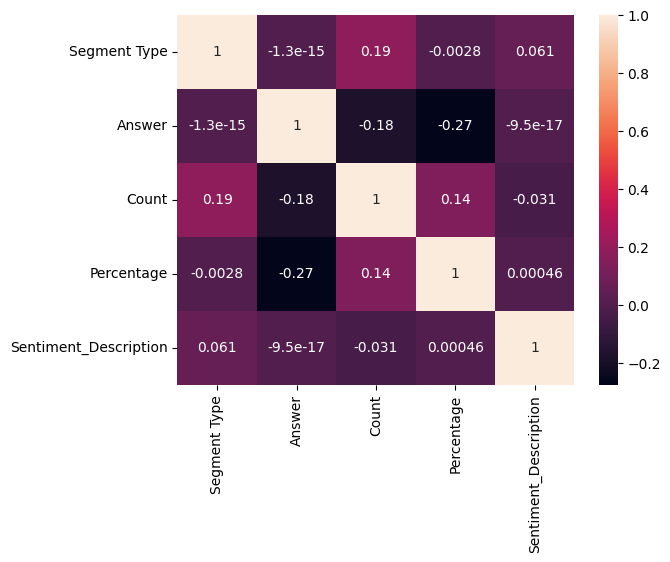

In [15]:
sns.heatmap(df.corr(),annot=True)

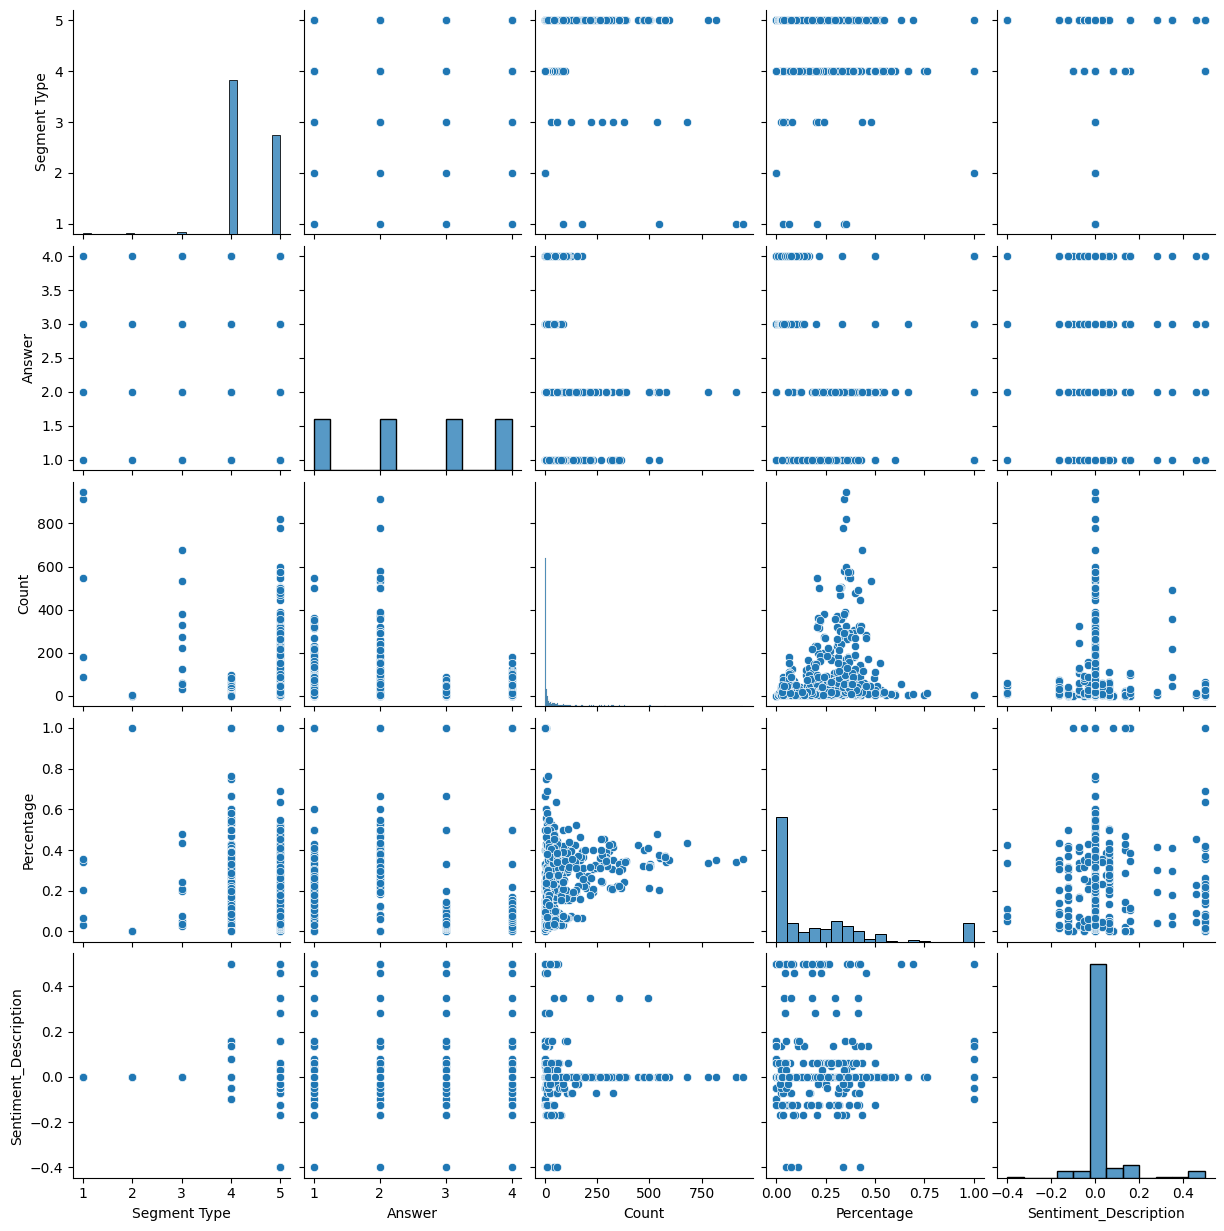

In [16]:
sns.pairplot(df)

<Axes: >

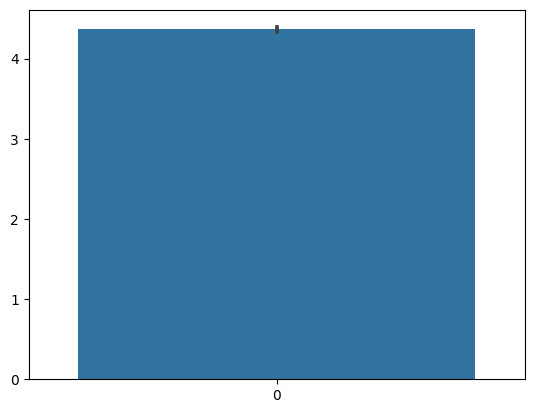

In [17]:
sns.barplot(df['Segment Type'])

<Axes: >

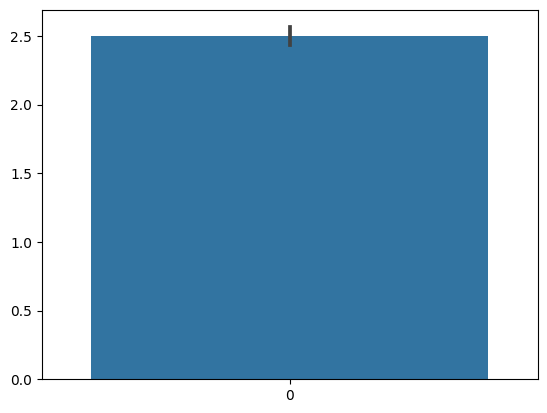

In [18]:
sns.barplot(df['Answer'])